# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#for i, city in enumerate(cities):
for i, city in enumerate(cities):        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # must specify key within dict
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | happy valley-goose bay
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | fort-shevchenko
Processing Record 5 of Set 1 | taulaga
Processing Record 6 of Set 1 | trevelin
Processing Record 7 of Set 1 | remire-montjoly
Processing Record 8 of Set 1 | bahia blanca
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | kerikeri
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | santa vitoria do palmar
Processing Record 17 of Set 1 | grand falls-windsor
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | vira

In [5]:
print(city_data)

[{'City': 'ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 287.96, 'Humidity': 46, 'Cloudiness': 0, 'Wind Speed': 6.71, 'Country': 'AR', 'Date': 1697662305}, {'City': 'happy valley-goose bay', 'Lat': 53.3168, 'Lng': -60.3315, 'Max Temp': 281.32, 'Humidity': 61, 'Cloudiness': 75, 'Wind Speed': 5.14, 'Country': 'CA', 'Date': 1697662306}, {'City': 'puerto natales', 'Lat': -51.7236, 'Lng': -72.4875, 'Max Temp': 288.4, 'Humidity': 47, 'Cloudiness': 75, 'Wind Speed': 7.2, 'Country': 'CL', 'Date': 1697662306}, {'City': 'fort-shevchenko', 'Lat': 44.5086, 'Lng': 50.263, 'Max Temp': 285.83, 'Humidity': 59, 'Cloudiness': 100, 'Wind Speed': 6.86, 'Country': 'KZ', 'Date': 1697662306}, {'City': 'taulaga', 'Lat': -11.0553, 'Lng': -171.0883, 'Max Temp': 300.71, 'Humidity': 80, 'Cloudiness': 21, 'Wind Speed': 6.84, 'Country': 'AS', 'Date': 1697662306}, {'City': 'trevelin', 'Lat': -43.0858, 'Lng': -71.4639, 'Max Temp': 297.86, 'Humidity': 36, 'Cloudiness': 0, 'Wind Speed': 3.93, 'Country': 'AR', 'Date

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)
city_data_df['Max Temp'] = city_data_df['Max Temp'].apply(lambda x: x - 273.15)


# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [32]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,14.81,46,0,6.71,AR,1697662305
1,happy valley-goose bay,53.3168,-60.3315,8.17,61,75,5.14,CA,1697662306
2,puerto natales,-51.7236,-72.4875,15.25,47,75,7.20,CL,1697662306
3,fort-shevchenko,44.5086,50.2630,12.68,59,100,6.86,KZ,1697662306
4,taulaga,-11.0553,-171.0883,27.56,80,21,6.84,AS,1697662306


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,287.96,46,0,6.71,AR,1697662305
1,happy valley-goose bay,53.3168,-60.3315,281.32,61,75,5.14,CA,1697662306
2,puerto natales,-51.7236,-72.4875,288.40,47,75,7.20,CL,1697662306
3,fort-shevchenko,44.5086,50.2630,285.83,59,100,6.86,KZ,1697662306
4,taulaga,-11.0553,-171.0883,300.71,80,21,6.84,AS,1697662306


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

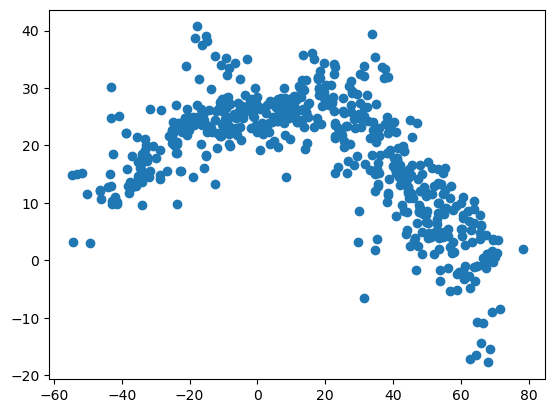

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'].apply(lambda x: x - 273.15))
#step 2: must make 'max temp' an int
#Incorporate the other graph properties
# plt.ylim(0, 1)
# plt.xlim(0, x_limit)

# Save the figure
plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

#### Latitude Vs. Humidity

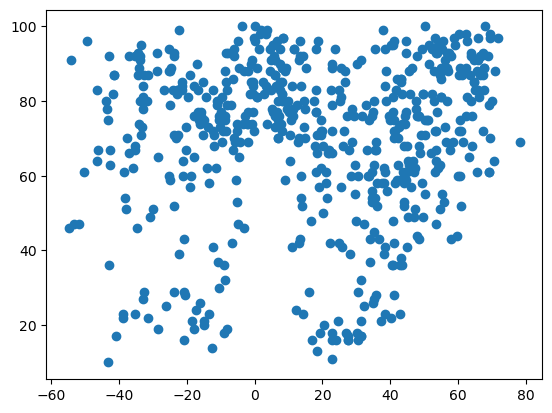

In [11]:
# Build the scatter plots for latitude vs. humidity
#x_axis = np.arange(len(city_data_df))
# plt.scatter(x_axis, city_data['Humidity'], marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

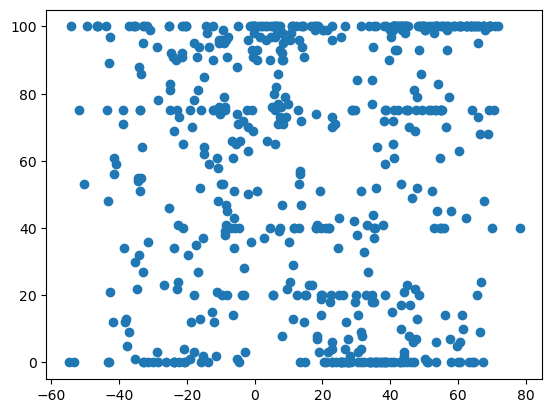

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

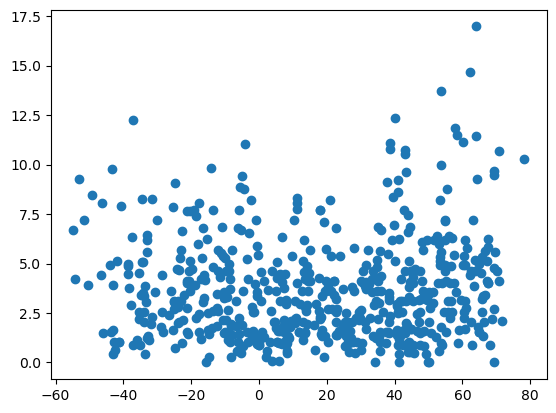

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def linreg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    return plt.annotate(line_eq, (0,20), fontsize=15,color="red")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,happy valley-goose bay,53.3168,-60.3315,281.32,61,75,5.14,CA,1697662306
3,fort-shevchenko,44.5086,50.2630,285.83,59,100,6.86,KZ,1697662306
6,remire-montjoly,4.9167,-52.2667,300.17,83,100,3.60,GF,1697662307
9,college,64.8569,-147.8028,272.12,83,100,1.54,US,1697662308
16,grand falls-windsor,48.9332,-55.6649,281.21,71,86,3.27,CA,1697662309


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,287.96,46,0,6.71,AR,1697662305
2,puerto natales,-51.7236,-72.4875,288.40,47,75,7.20,CL,1697662306
4,taulaga,-11.0553,-171.0883,300.71,80,21,6.84,AS,1697662306
5,trevelin,-43.0858,-71.4639,297.86,36,0,3.93,AR,1697662307
7,bahia blanca,-38.7196,-62.2724,295.27,22,75,4.47,AR,1697662307


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 20, 'y = -0.46x + 306.26')

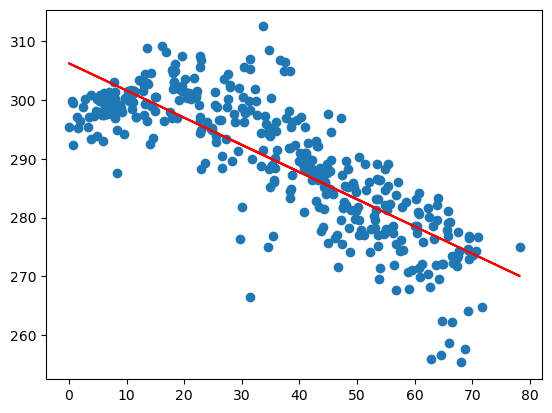

In [47]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

Text(0, 20, 'y = 0.32x + 301.89')

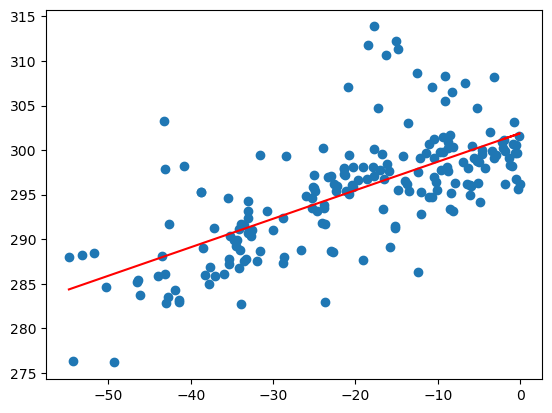

In [48]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** As the latitude moves more north or south from the equator (increasing or decreasing from 0), it is correlated with a temperature decrease.

### Humidity vs. Latitude Linear Regression Plot

Text(0, 20, 'y = 0.07x + 67.6')

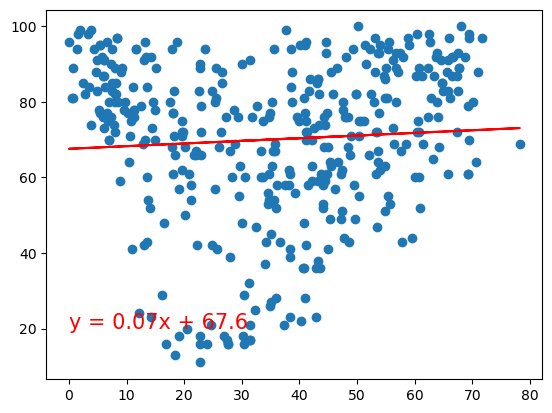

In [49]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

Text(0, 20, 'y = 0.19x + 71.82')

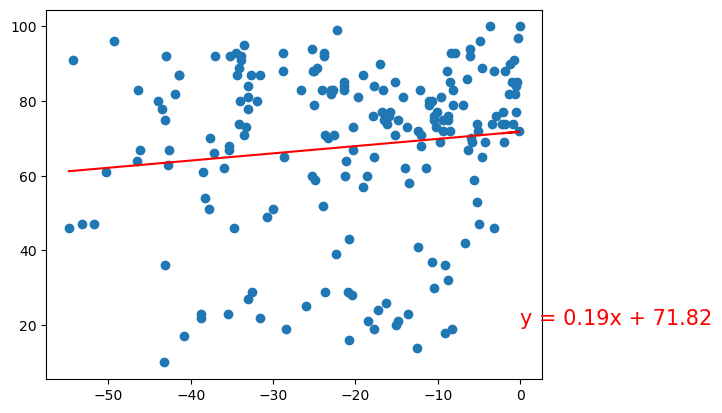

In [50]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** There isn't a strong correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 20, 'y = 0.13x + 54.73')

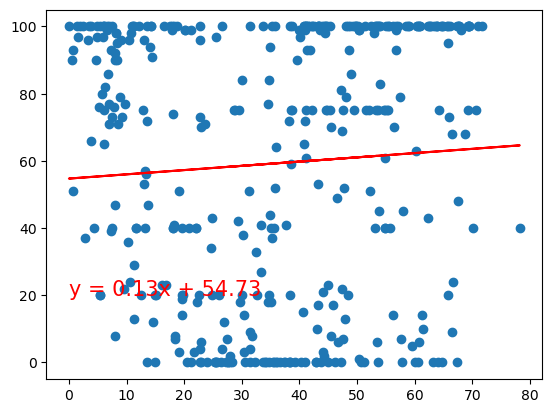

In [51]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

Text(0, 20, 'y = 0.21x + 61.46')

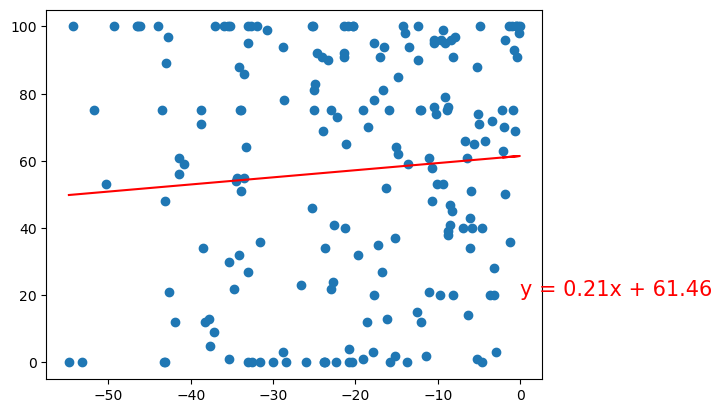

In [52]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** In the Northern Hemisphere, there seems to be many cities with 100% cloudiness, <80% cloudiness, and 0% cloudiness. My inference is that this is due to the presence of both temperate rainforests and deserts across the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 20, 'y = 0.04x + 2.27')

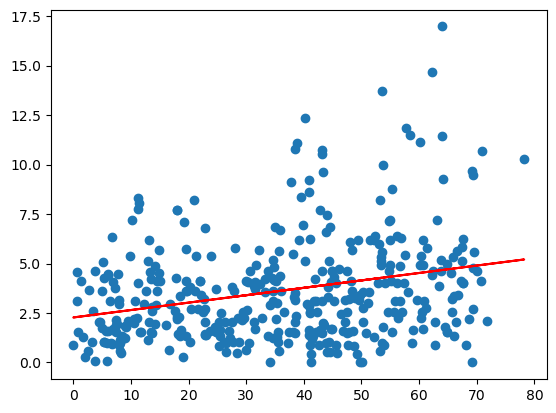

In [53]:
# Northern Hemisphere
linreg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

Text(0, 20, 'y = -0.02x + 3.47')

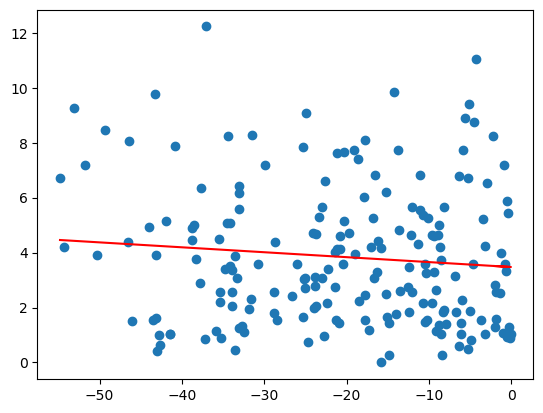

In [54]:
# Southern Hemisphere
linreg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** An increase in Latitude north or south correlates with a wider spread of wind speeds